# Banana Quality Classification: Logistic Regression + KNN

This notebook implements two traditional algorithms on the `banana_quality.csv` dataset:
1. Logistic Regression for classification
2. K-Nearest Neighbors for classification


In [10]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt

In [11]:
# 2. Load and inspect data
df = pd.read_csv('banana_quality.csv')
print('Data shape:', df.shape)
print('Columns:', df.columns.tolist())
df.head()

Data shape: (8000, 8)
Columns: ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity', 'Quality']


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [12]:
# 3. Encode the Quality label
le = LabelEncoder()
df['QualityEnc'] = le.fit_transform(df['Quality'])
print('Mapping:', dict(zip(le.classes_, le.transform(le.classes_))))

Mapping: {'Bad': np.int64(0), 'Good': np.int64(1)}


In [13]:
# 4. Split features and target
feature_cols = [c for c in df.columns if c not in ['Quality', 'QualityEnc']]
X = df[feature_cols].values
y = df['QualityEnc'].values
print('X shape:', X.shape, 'Label distribution:', np.bincount(y))

X shape: (8000, 7) Label distribution: [3994 4006]


In [14]:
# 5. Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
print('Train shape:', X_train_s.shape, 'Test shape:', X_test_s.shape)

Train shape: (6400, 7) Test shape: (1600, 7)


In [15]:
# 6. Train and evaluate Logistic Regression and KNN
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
}

results = {}
for name, model in models.items():
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    y_proba = model.predict_proba(X_test_s)[:,1]
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = (acc, cm, y_pred, y_proba)
    print(f'=== {name} ===')
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', cm)
    print('Classification Report:\n', classification_report(y_test, y_pred, target_names=le.classes_))

=== Logistic Regression ===
Accuracy: 0.87125
Confusion Matrix:
 [[677 122]
 [ 84 717]]
Classification Report:
               precision    recall  f1-score   support

         Bad       0.89      0.85      0.87       799
        Good       0.85      0.90      0.87       801

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600

=== KNN ===
Accuracy: 0.9775
Confusion Matrix:
 [[785  14]
 [ 22 779]]
Classification Report:
               precision    recall  f1-score   support

         Bad       0.97      0.98      0.98       799
        Good       0.98      0.97      0.98       801

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



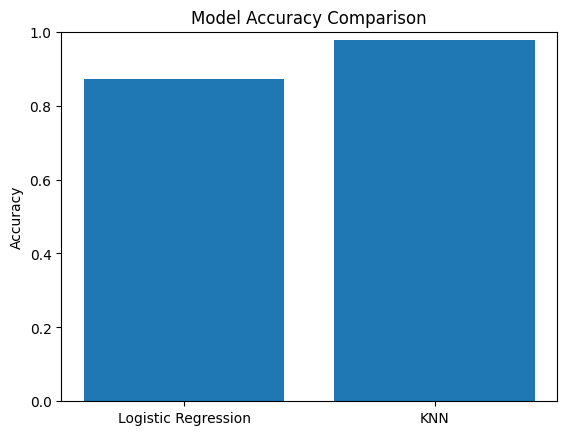

In [16]:
# 7. Plot accuracy comparison
plt.figure()
plt.bar(results.keys(), [r[0] for r in results.values()])
plt.ylim(0,1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

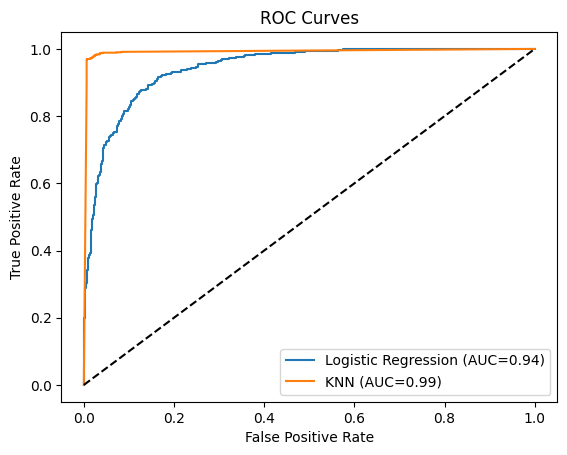

In [17]:
# 8. Plot ROC curves
plt.figure()
for name, (_, _, _, y_proba) in results.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()